<a href="https://colab.research.google.com/github/gh0st-kid/TimeSeries_Analysis_and_Forecasting/blob/main/TSPreparation(q).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import (mean_squared_error, mean_absolute_error,
                             mean_absolute_percentage_error)
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
def check_versions():
  print(f'Pandas версия: {pd.__version__}')
  print(f'Numpy версия: {np.__version__}')
  print(f'Matplotlib версия: {plt.matplotlib.__version__}')
  print(f'Seaborn версия: {sns.__version__}')
  print(f'Scikit-learn версия: {sklearn.__version__}')
  print(f'Statsmodels версия: {sm.__version__}')
  print(f'Библиотеки успешно импортированы.')

check_versions()

Pandas версия: 2.2.2
Numpy версия: 1.26.4
Matplotlib версия: 3.7.1
Seaborn версия: 0.13.1
Scikit-learn версия: 1.5.2
Statsmodels версия: 0.14.4
Библиотеки успешно импортированы.


In [ ]:
def load_and_prepare_data(file_path):
    """
    Загружает и подготавливает данные из CSV файла.

    Аргументы:
    file_path : str
        Путь к CSV файлу с данными.

    Возвращает:
    pandas.DataFrame
        Подготовленный датафрейм с данными, где:
        - Удалены пробелы из названий столбцов.
        - Столбец 'year' преобразован в кварталы и удалён.
        - Все числовые столбцы преобразованы в тип float.
        - Данные отсортированы по кварталу.
    """

    df = pd.read_csv(file_path, delimiter=',')

    # Удаление пробелов из названий столбцов
    df.columns = df.columns.str.strip()

    # Преобразование столбца 'year' в даты
    df['year'] = pd.to_datetime(df['year'], format='%m/%d/%Y')

    # Преобразование даты в кварталы
    df['quarter'] = df['year'].dt.to_period('Q')

    # Преобразование числовых столбцов
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    df[numeric_columns] = df[numeric_columns].astype(float)

    # Сортировка по кварталам
    df.sort_values('quarter', inplace=True)

    # Удаление столбца 'year' и установка квартала в качестве индекса
    df.drop(columns=['year'], inplace=True)  # Удаляем столбец 'year'
    df.set_index('quarter', inplace=True)    # Устанавливаем 'quarter' в качестве индекса

    # Преобразование индекса из PeriodIndex в DatetimeIndex
    df.index = df.index.to_timestamp()

    return df


df = load_and_prepare_data('/content/df.csv')

In [ ]:
df.head(10)

,zan(cfo),zan(szfo),zan(ufo),zan(skfo),zan(pfo),zan(uralfo),zan(sfo),zan(dfo),bezr(cfo),bezr(szfo),...,bezr(sfo),bezr(dfo),srd(cfo),srd(szfo),srd(ufo),srd(skfo),srd(pfo),srd(uralfo),srd(sfo),srd(dfo)
quarter,,,,,,,,,,,,,,,,,,,,,
2010-01-01,19402.5,7169.8,6260.5,3433.2,14150.9,5872.8,8821.8,3049.5,1143.2,524.3,...,1018.8,354.1,20994.4,17568.0,12560.4,10168.8,13275.0,19566.3,12770.6,17202.3
2010-04-01,19675.6,7175.0,6532.1,3714.1,14762.3,5988.3,9167.9,3125.1,944.4,443.9,...,894.2,291.9,25046.3,20140.8,14287.9,12212.4,15659.0,21734.1,14862.1,20543.2
2010-07-01,19895.0,7257.4,6588.1,3703.4,14957.0,6077.4,9461.4,3232.5,900.3,415.4,...,779.5,248.2,23340.4,19058.9,15746.2,13841.7,15731.1,21178.0,14817.9,20412.1
2010-10-01,19892.0,7149.9,6374.2,3703.8,14787.7,6081.8,9110.5,3161.3,855.2,427.5,...,786.9,286.0,29517.9,22802.4,17856.1,17200.4,18629.5,24847.0,17523.5,24927.0
2011-01-01,19722.3,7204.1,6415.3,3670.4,14396.5,6008.9,8923.6,3163.7,943.6,475.3,...,869.3,293.1,22688.4,19065.0,14001.0,11427.8,14494.9,20607.8,14291.7,18913.8
2011-04-01,19974.6,7260.7,6474.7,3832.3,14809.1,6141.6,9166.9,3198.5,836.4,372.5,...,836.5,233.9,27060.0,21536.3,15696.5,13579.3,16737.6,23583.6,16273.5,21702.1
2011-07-01,20342.7,7347.3,6605.1,3901.0,15057.5,6170.0,9315.7,3248.7,828.8,362.3,...,768.8,238.5,25919.8,20866.1,17494.3,15845.5,17440.6,23509.8,16274.1,22692.8
2011-10-01,20188.0,7309.3,6452.0,3762.0,14940.3,6088.5,9127.4,3207.8,821.5,354.6,...,748.3,251.8,32849.0,23565.9,19222.4,19677.1,20433.5,28153.3,19448.0,28099.1
2012-01-01,20106.7,7274.9,6406.9,3732.5,14458.1,6041.3,8898.5,3156.9,784.2,352.1,...,740.8,262.7,24303.0,19997.0,14824.0,12986.0,16201.0,22502.0,15772.0,19449.0


In [ ]:
def plot_time_series(data, filter_str, title, ylabel):
  """
  Строит график временного ряда на основе переданных данных.

  Аргументы:
  data : pandas.DataFrame
      Датафрейм с данными для построения графика.
  filter_str : str
      Подстрока для фильтрации колонок в датафрейме.
  title : str
      Заголовок графика.
  ylabel : str
      Название оси Y.

  Возвращает:
  None
      Функция отображает график временного ряда и не возвращает значения.
  """
  sns.set(style='whitegrid')
  sns.set_palette('pastel')
  plt.figure(figsize=(12, 8))
  sns.lineplot(data=data.filter(like=filter_str), markers=True)
  plt.title(title, fontsize=16)
  plt.xlabel('Год', fontsize=14)
  plt.ylabel(ylabel, fontsize=14)
  plt.legend(title='Округа', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.grid(True)
  plt.show()

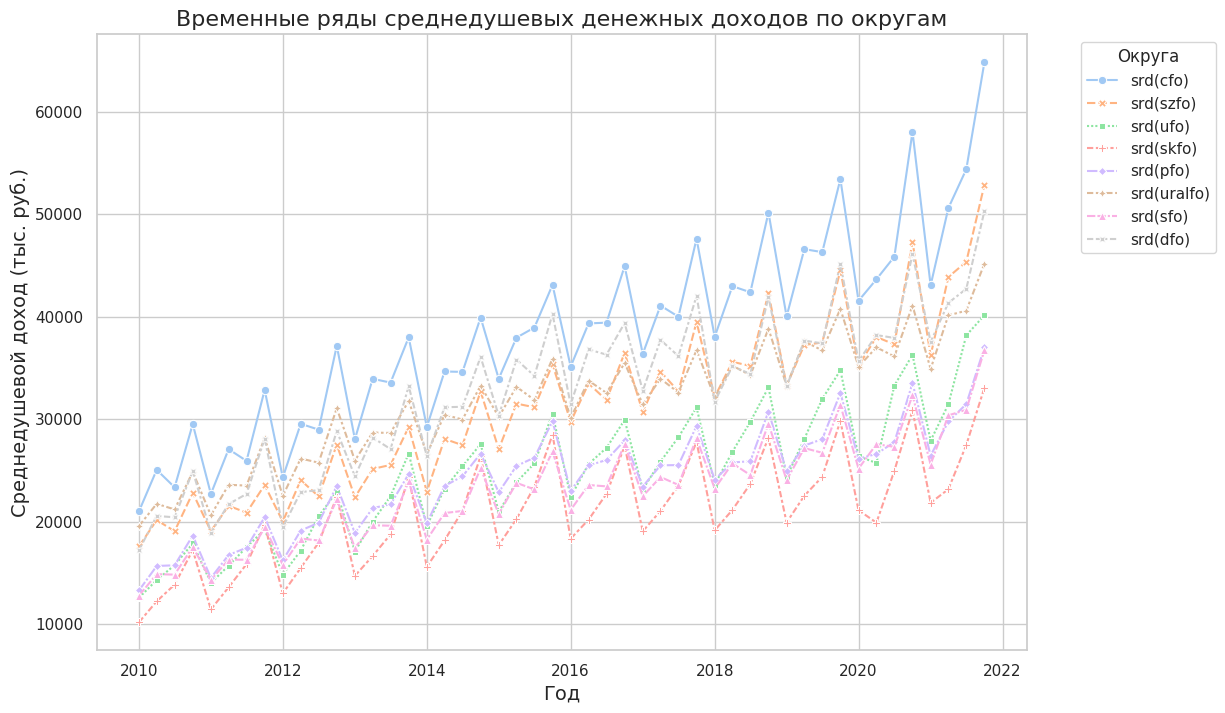

In [ ]:
plot_time_series(df, 'srd',
                 'Временные ряды среднедушевых денежных доходов по округам',
                 'Среднедушевой доход (тыс. руб.)')

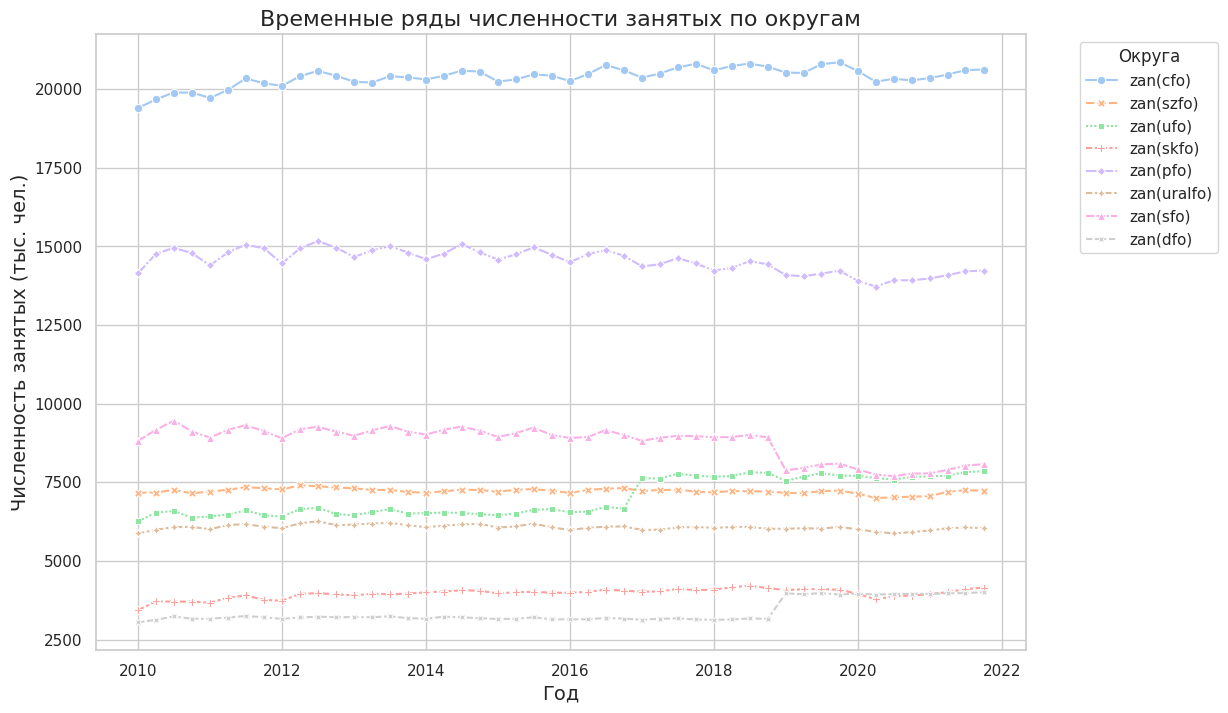

In [ ]:
plot_time_series(df, 'zan',
                 'Временные ряды численности занятых по округам',
                 'Численность занятых (тыс. чел.)')

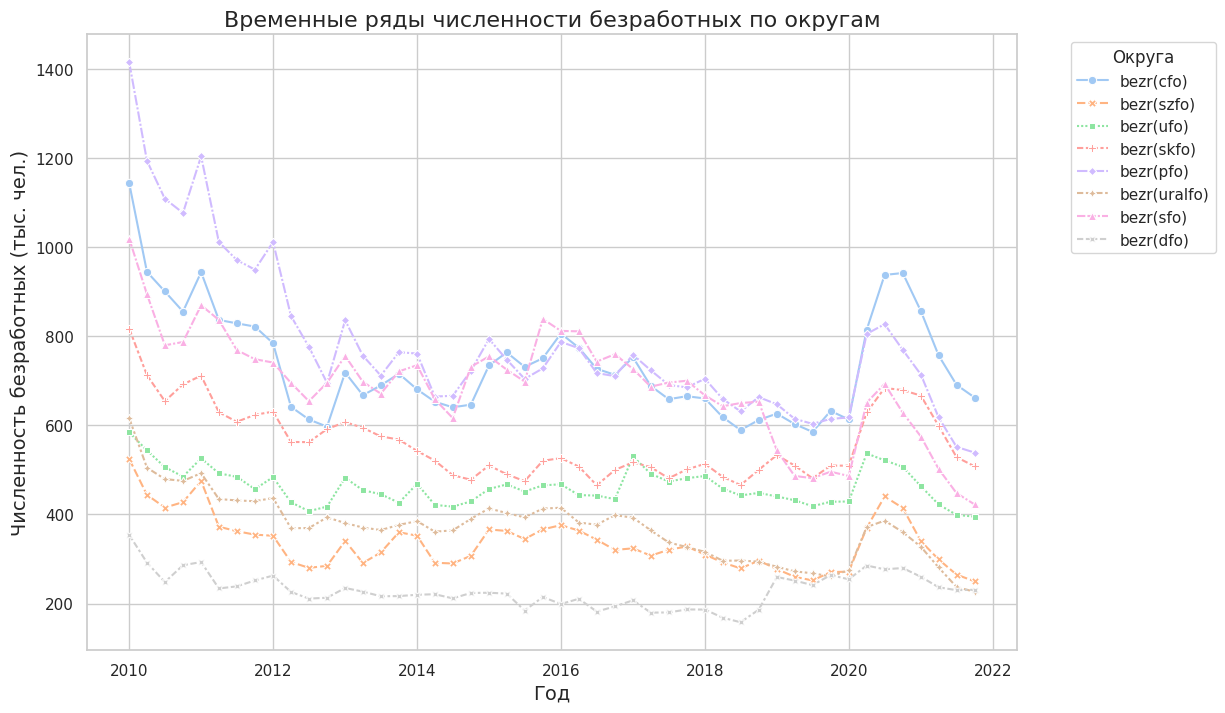

In [ ]:
plot_time_series(df, 'bezr',
                 'Временные ряды численности безработных по округам',
                 'Численность безработных (тыс. чел.)')

In [ ]:
def analyze_variable(data, column_name):
  """
  Анализирует и визуализирует временной ряд для указанной переменной.

  Аргументы:
  data : pandas.DataFrame
      Датафрейм с данными.
  column_name : str
      Название переменной(столбца) для анализа.

  Возвращает:
  None
      Функция выводит статистику переменной и отображает график временного
      ряда, не возвращая значений.
  """
  data = df.loc[:, [column_name]]
  stats = data.describe()

  # Вывод статистики
  print(f'статистика для переменной {column_name}')
  print(stats)

  # Визуализация временного ряда
  plt.figure(figsize=(12, 6))
  sns.lineplot(x=data.index, y=column_name, data=data, marker='o',
               label=column_name)
  plt.title(f'Временной ряд переменной {column_name}')
  plt.xlabel('Год')
  plt.ylabel(column_name)
  plt.legend()
  plt.grid(True)
  plt.show()

статистика для переменной zan(ufo)
          zan(ufo)
count    48.000000
mean   7021.320833
std     593.036076
min    6260.500000
25%    6514.825000
50%    6646.650000
75%    7683.225000
max    7851.500000


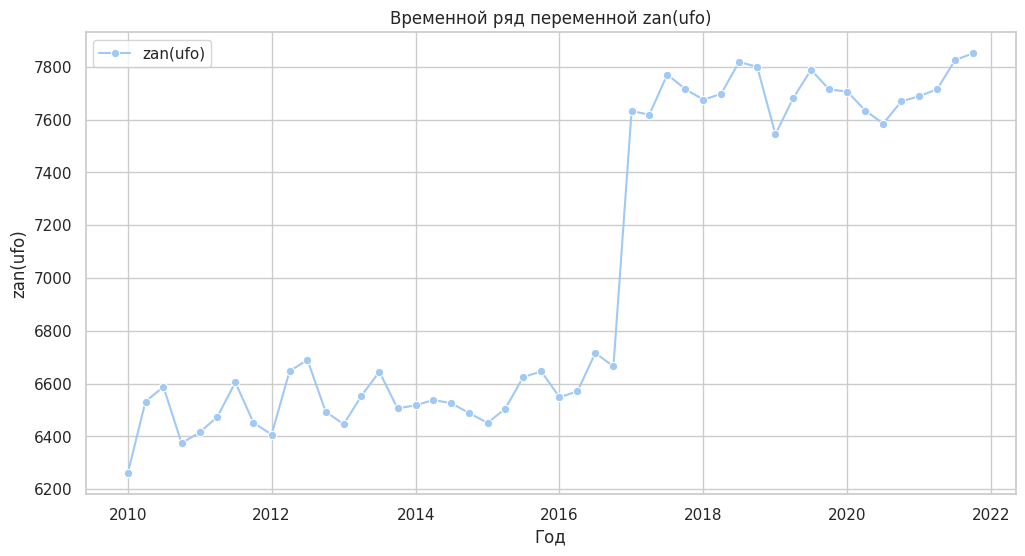

In [ ]:
analyze_variable(df,'zan(ufo)')

In [ ]:
def decompose_time_series(df, column_name):
    """
    Выполняет декомпозицию временного ряда на тренд, сезонность и остаток.

    Аргументы:
    df : pandas.DataFrame
      Датасет, содержащий временной ряд.
    column_name : str
      Название колонки, содержащей временной ряд для декомпозиции.

    Возвращает:
    None

    Дополнительно:
    Выводит графики исходного ряда, тренда, сезонности и остатка.
    """
    # Декомпозиция временного ряда на тренд, сезонность и остаток
    result = seasonal_decompose(df[column_name], model='additive', period=4)
    trend = result.trend
    seasonal = result.seasonal
    residual = result.resid

    # Визуализация результатов
    plt.figure(figsize=(12, 8))

    plt.subplot(4, 1, 1)
    plt.plot(df[column_name], label='Исходный ряд', color='blue')
    plt.legend(loc='upper left')
    plt.title(f'Исходный временной ряд: {column_name}')

    plt.subplot(4, 1, 2)
    plt.plot(trend, label='Тренд', color='orange')
    plt.legend(loc='upper left')
    plt.title('Тренд')

    plt.subplot(4, 1, 3)
    plt.plot(seasonal, label='Сезонность', color='green')
    plt.legend(loc='upper left')
    plt.title('Сезонность')

    plt.subplot(4, 1, 4)
    plt.plot(residual, label='Остаток', color='red')
    plt.legend(loc='upper left')
    plt.title('Остаток')

    plt.tight_layout()
    plt.show()

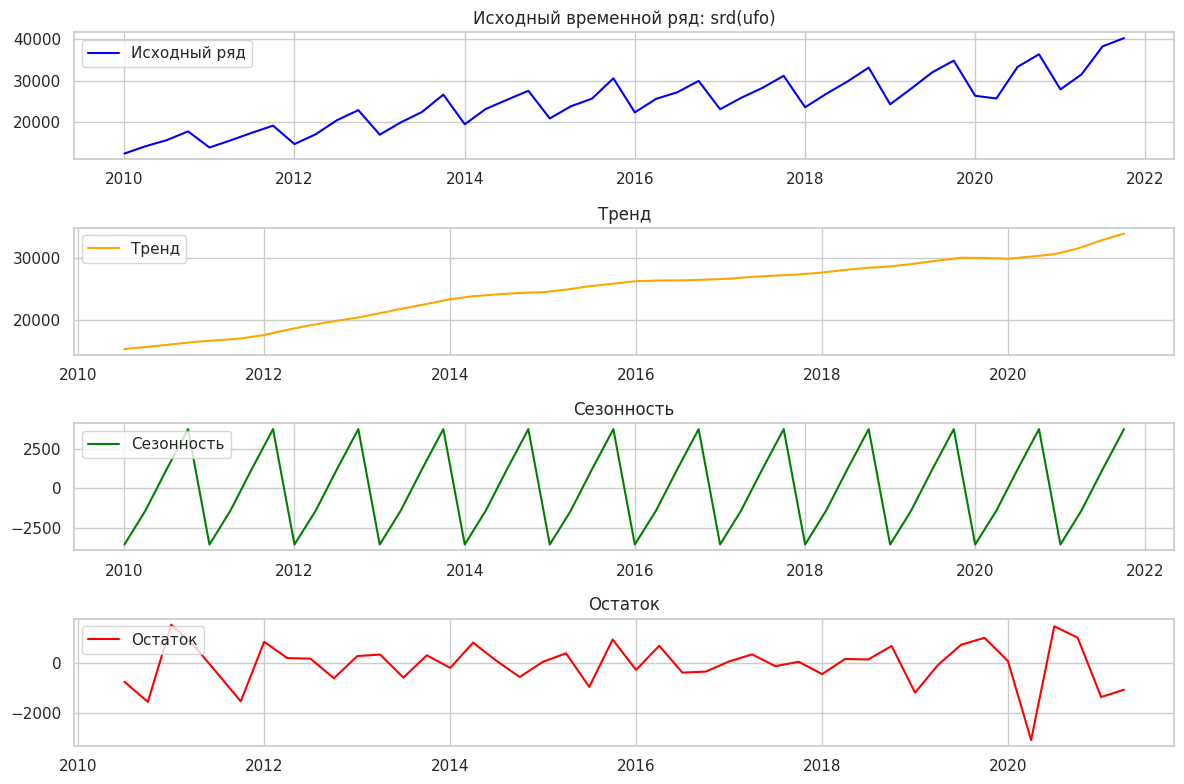

In [ ]:
decompose_time_series(df, 'srd(ufo)')

In [ ]:
def adf_test(series):
    """
    Проводит тест на единичный корень(ADF-тест) для проверки стационарности
    временного ряда.

    Аргументы:
    series : pandas.Series
      Временной ряд, который нужно протестировать на стационарность.

    Возвращает:
    bool
      True, если временной ряд стационарен(p-value <= 0.05), иначе False.

    Дополнительно:
    Выводит на экран статистику ADF, p-value и критические значения.
    """
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    return result[1] <= 0.05

In [ ]:
adf_test(df['bezr(cfo)'])

ADF Statistic: -2.7994998207873305
p-value: 0.05834525063680254
Critical Values: {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}


False

In [ ]:
def differentiate_series(data, variable_name, max_diff=5):
    """
    Приводит временной ряд из датафрейма к стационарному виду путём
    дифференциации.

    Аргументы:
    data : pandas.DataFrame
      Датафрейм, содержащий временные ряды.
    variable_name : str
      Название переменной(столбца), который нужно дифференцировать для
      достижения стационрности.
    max_diff : int, optional
      Максимальное количество дифференциаций, которые можно выполнить.
      По умолчанию 5.

    Возвращает:
      -pandas.DataFrame : Датафрейм с дифференцированными временными рядами.

    Дополнительно:
    Если ряд становится стационарным до достижения максимального количества
    дифференциаций, процесс останавливается и возвращается результат на этом
    этапе. Если ряд уже стационарен, выводится соответствующее сообщение.
    """
    series = data[variable_name]
    df_diff = pd.DataFrame()
    num_diff = 0

    if adf_test(series):
      print('Исходный ряд уже стационарен. Дифференциация не требуется.')
      return None

    while num_diff <= max_diff:
      if adf_test(series):
        print(f'Ряд стационарен после {num_diff} дифференциаций.')
        break
      series = series.diff().dropna()
      num_diff += 1
      suffix = f'_diff_{num_diff}'
      df_diff[f'{variable_name}{suffix}'] = series

    if num_diff > max_diff and not adf_test(series):
      print(f'Превышено максимально количество дифференциаций ({max_diff})./nРяд всё ещё не стационарен')

    return df_diff

In [ ]:
differentiate_series(df, 'bezr(cfo)')

ADF Statistic: -2.7994998207873305
p-value: 0.05834525063680254
Critical Values: {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}
ADF Statistic: -2.7994998207873305
p-value: 0.05834525063680254
Critical Values: {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}
ADF Statistic: -6.140535281590984
p-value: 7.991415298953591e-08
Critical Values: {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}
Ряд стационарен после 1 дифференциаций.


,bezr(cfo)_diff_1
quarter,
2010-04-01,-198.8
2010-07-01,-44.1
2010-10-01,-45.1
2011-01-01,88.4
2011-04-01,-107.2
2011-07-01,-7.6
2011-10-01,-7.3
2012-01-01,-37.3
2012-04-01,-142.7


In [ ]:
def plot_stationary_series(series, variable_name, num_diff):
    """
    Визуализирует дифференцированный временной ряд.

    Аргументы:
    series : pandas.Series
      Дифференцированный временной ряд, который нужно визуализировать.
    variable_name : str
      Название переменной(столбца), соответствующего данному временному ряду.
    num_diff : int
      Количество проведённых дифференциаций, после которых получен данный ряд.

    Возвращает:
      None

    Дополнительно:
    Отображает график дифференцированного временного ряда.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(series)
    plt.title(f'Дифференцированный ряд {variable_name} (после {num_diff} дифференциаций)')
    plt.show()

In [ ]:
df_diff = differentiate_series(df, 'bezr(cfo)')

ADF Statistic: -2.7994998207873305
p-value: 0.05834525063680254
Critical Values: {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}
ADF Statistic: -2.7994998207873305
p-value: 0.05834525063680254
Critical Values: {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}
ADF Statistic: -6.140535281590984
p-value: 7.991415298953591e-08
Critical Values: {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}
Ряд стационарен после 1 дифференциаций.


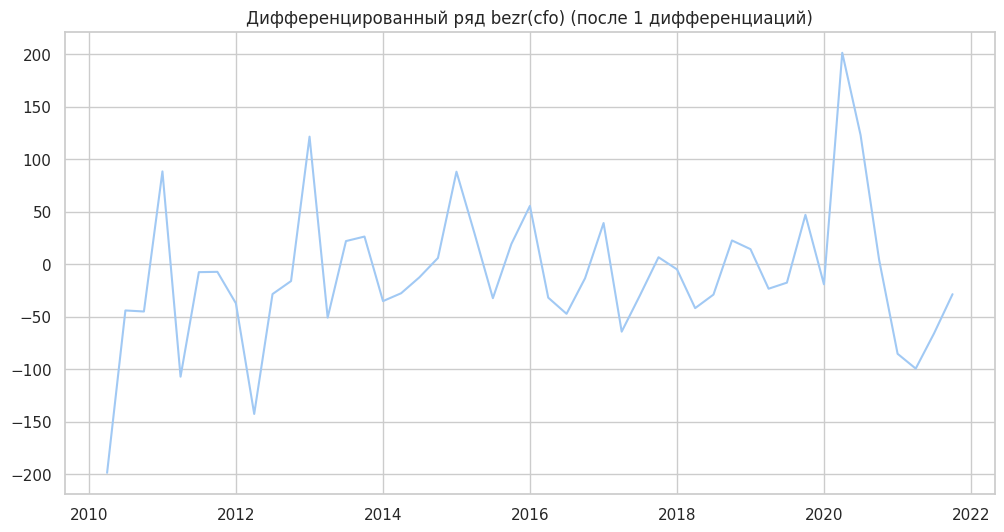

In [ ]:
plot_stationary_series(df_diff['bezr(cfo)_diff_1'], 'bezr(cfo)', num_diff=1)

In [ ]:
# Функция проверки сезонности
def check_seasonality(series, seasonal_period=4):
    """
    Проверяет наличие сезонности во временном ряде с использованием ACF.

    Аргументы:
    series : pandas.Series
        Временной ряд для анализа.
    seasonal_period : int
        Период сезонности.

    Возвращает:
    bool
        True, если сезонность обнаружена, иначе False.
    """
    acf_values_seasonal = acf(series, nlags=seasonal_period)
    critical_value = 1.96 / np.sqrt(len(series))

    plt.figure(figsize=(10, 6))
    plt.stem(range(1, seasonal_period + 1), acf_values_seasonal[1:])
    plt.xlabel('Лаг')
    plt.ylabel('Значение ACF')
    plt.title('Сезонный ACF для временного ряда')
    plt.show()

    has_seasonality = any(np.abs(acf_values_seasonal[1:]) > critical_value)
    if has_seasonality:
        print("Обнаружена сезонность во временном ряду.")
    else:
        print("Сезонность во временном ряду не обнаружена.")

    return has_seasonality

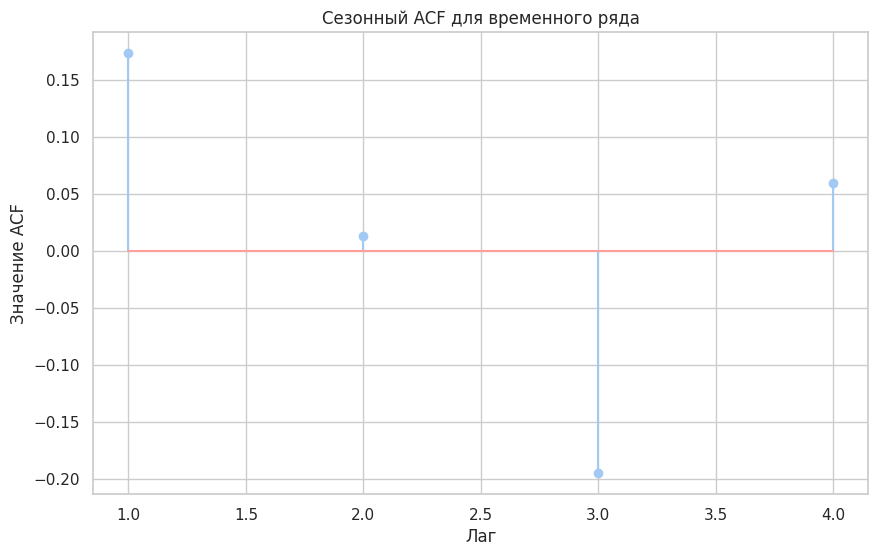

Сезонность во временном ряду не обнаружена.


False

In [ ]:
check_seasonality(df_diff['bezr(cfo)_diff_1'].dropna())

In [ ]:
# Функция для построения ACF и PACF
def plot_acf_pacf(series, lags=10):
    """
    Строит графики автокорреляционной функции(ACF) и частичной
    автокорреляционной функции(PACF) для стационарного временного
    ряда.

    Аргументы:
    series : pandas.Series
        Стационарный временной ряд, для которого нужно построить
        графики ACF и PACF.
    lags : int
        Количество лагов для анализа.

    Возвращает:
    None

    Дополнительно:
    Отображает два графика: ACF и PACF.
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    #ACF
    plot_acf(series, ax=axes[0])
    axes[0].set_title('ACF')

    #PACF
    plot_pacf(series, ax=axes[1])
    axes[1].set_title('PACF')

    plt.show()

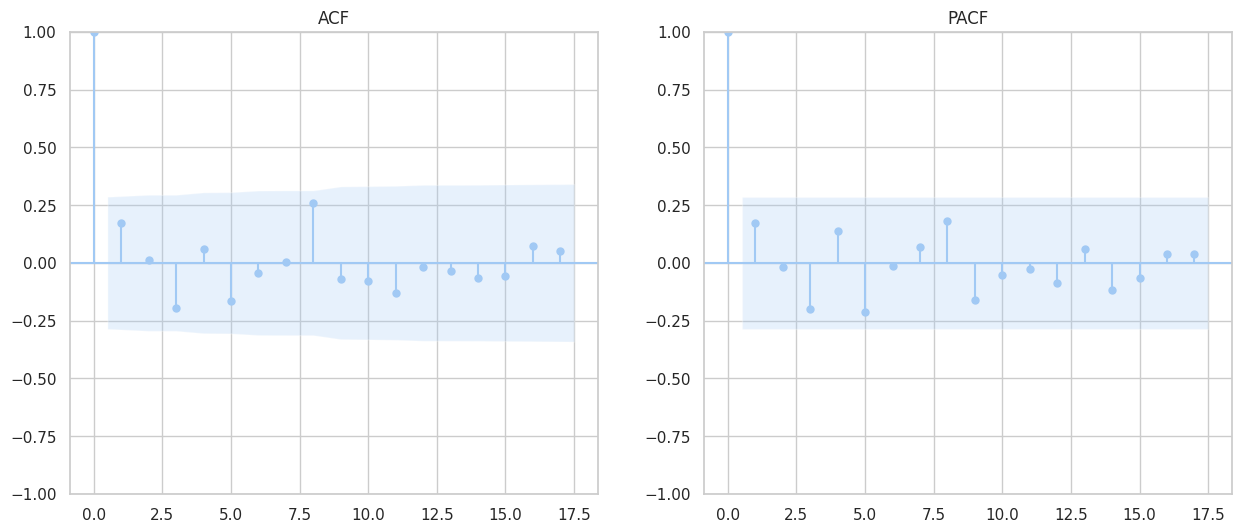

In [ ]:
plot_acf_pacf(df_diff['bezr(cfo)_diff_1'].dropna(), lags=10)

In [ ]:
def pipeline(data, variable_name, max_diff=5, plot_diff_series=True,
             plot_acf_pacf_flag=True, lags=10, seasonal_period=4):
    """
    Выполняет конвейерный анализ временного ряда, включая проверку на
    стационарность, дифференциацию, визуализацию ряда и построение
    ACF/PACF графиков.

    Аргументы:
    data : pandas.DataFrame
        Датафрейм, содержащий временные ряды.
    variable_name : str
        Название переменной (столбца), которую нужно анализировать.
    max_diff : int, optional
        Максимальное количество дифференциаций для достижения стационарности.
        По умолчанию 5.
    plot_diff_series : bool, optional
        Флаг, определяющий, нужно ли визуализировать дифференцированный ряд.
        По умолчанию True.
    plot_acf_pacf_flag : bool, optional
        Флаг, определяющий, нужно ли строить графики ACF и PACF.
        По умолчанию True.
    lags : int, optional
        Количество лагов для графиков ACF и PACF. По умолчанию 10.

    Возвращает:
    None

    Дополнительно:
    В зависимости от переданных параметров, функция выполняет соответствующие
    шаги анализа.
    """
    # Шаг 1: Дифференциация временного ряда для достижения стационарности
    df_diff = differentiate_series(data, variable_name, max_diff=max_diff)

    if df_diff is not None:
        # Если ряд был дифференцирован, извлекаем последний стационарный ряд
        last_stationary_series = df_diff.iloc[:, -1]
        num_diff = len(df_diff.columns)

        # Шаг 2: Визуализация дифференцированного ряда
        if plot_diff_series:
            plot_stationary_series(last_stationary_series, variable_name,
                                   num_diff)

        # Шаг 3: Проверка сезонности на дифференцированном ряде:
        print('\nПроверка сезонности на дифференцированном ряде:')
        check_seasonality(last_stationary_series.dropna(),
                          seasonal_period=seasonal_period)

        # Шаг 4: Построение графиков ACF и PACF для стационарного ряда
        if plot_acf_pacf_flag:
            plot_acf_pacf(last_stationary_series.dropna(), lags=lags)
    else:
        # Если дифференциация не потребовалась и ряд изначально стационарен
        print('Исходный ряд уже стационарен. Дифференциация не требуется.')

        # Визуализация исходного стационарного ряда
        if plot_diff_series:
            plt.figure(figsize=(12, 6))
            plt.plot(data[variable_name])
            plt.title(f'Исходный стационарный ряд {variable_name}')
            plt.show()

        # Проверка сезонности на исходном ряде
        print('\nПроверка сезонности на исходном ряде:')
        check_seasonality(data[variable_name].dropna(),
                          seasonal_period=seasonal_period)

        # Построение графиков ACF и PACF для исходного ряда
        if plot_acf_pacf_flag:
            plot_acf_pacf(data[variable_name], lags=lags)

    print("Анализ завершен.")

ADF Statistic: -2.7994998207873305
p-value: 0.05834525063680254
Critical Values: {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}
ADF Statistic: -2.7994998207873305
p-value: 0.05834525063680254
Critical Values: {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}
ADF Statistic: -6.140535281590984
p-value: 7.991415298953591e-08
Critical Values: {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}
Ряд стационарен после 1 дифференциаций.


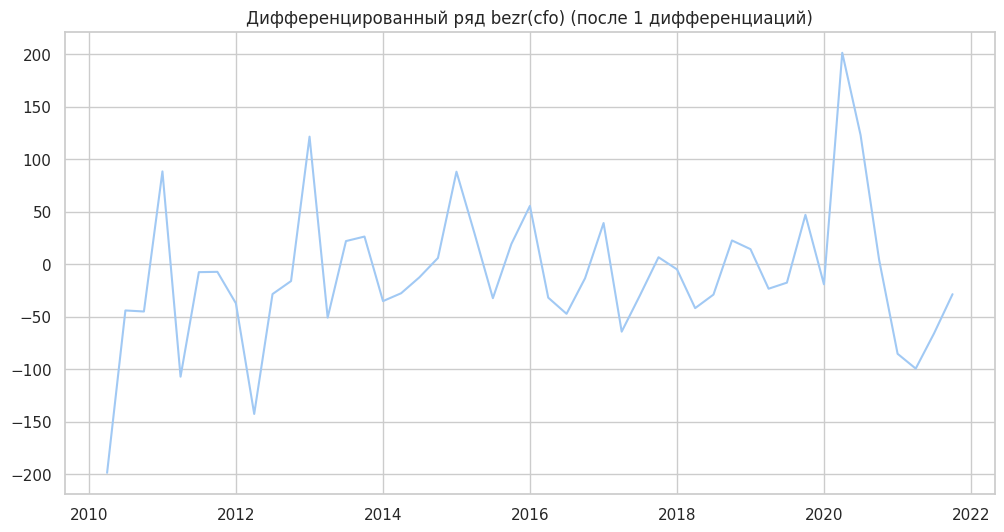


Проверка сезонности на дифференцированном ряде:


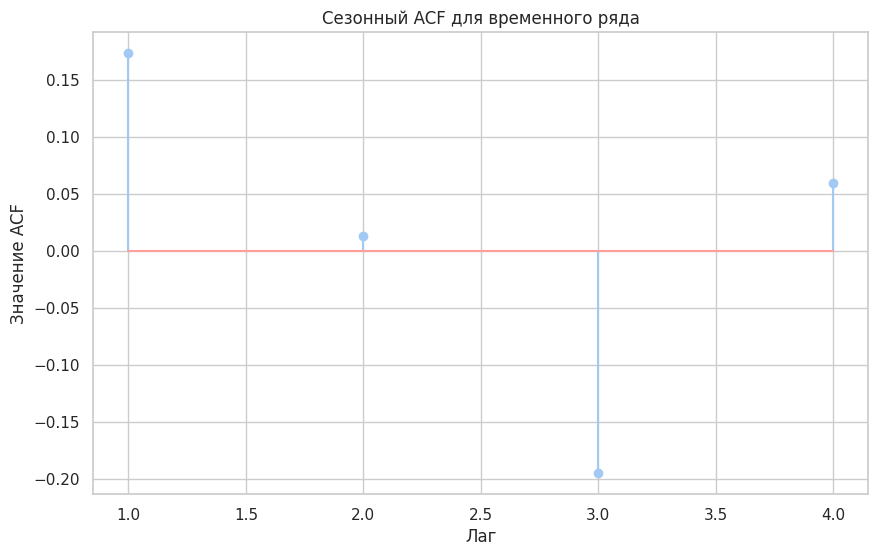

Сезонность во временном ряду не обнаружена.


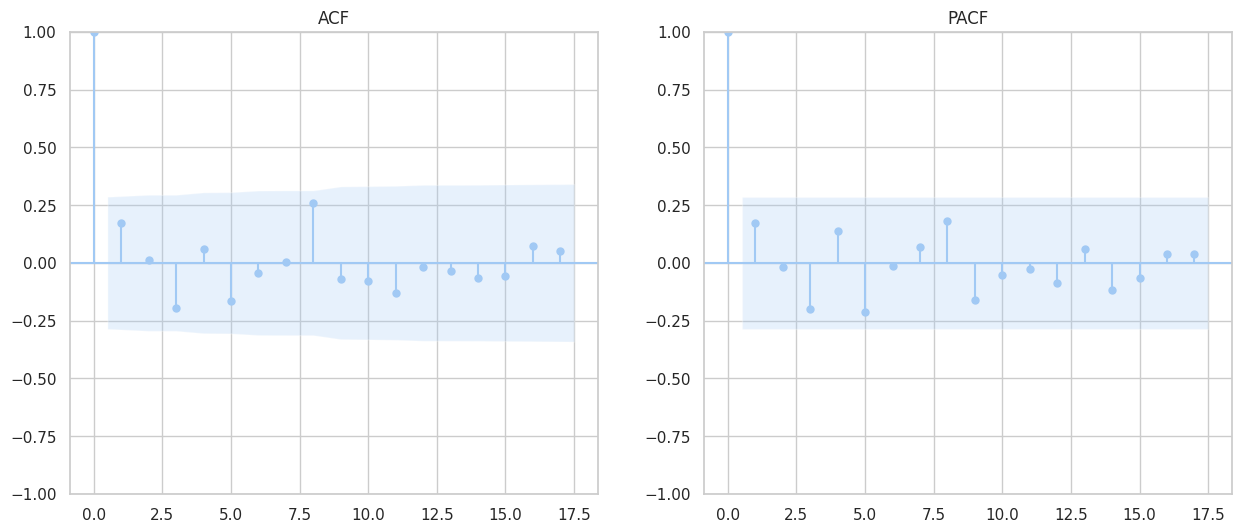

Анализ завершен.


In [ ]:
pipeline(df, 'bezr(cfo)', plot_diff_series=True, plot_acf_pacf_flag=True)

ADF Statistic: -2.7994998207873305
p-value: 0.05834525063680254
Critical Values: {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}
ADF Statistic: -2.7994998207873305
p-value: 0.05834525063680254
Critical Values: {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}
ADF Statistic: -6.140535281590984
p-value: 7.991415298953591e-08
Critical Values: {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}
Ряд стационарен после 1 дифференциаций.

Проверка сезонности на дифференцированном ряде:


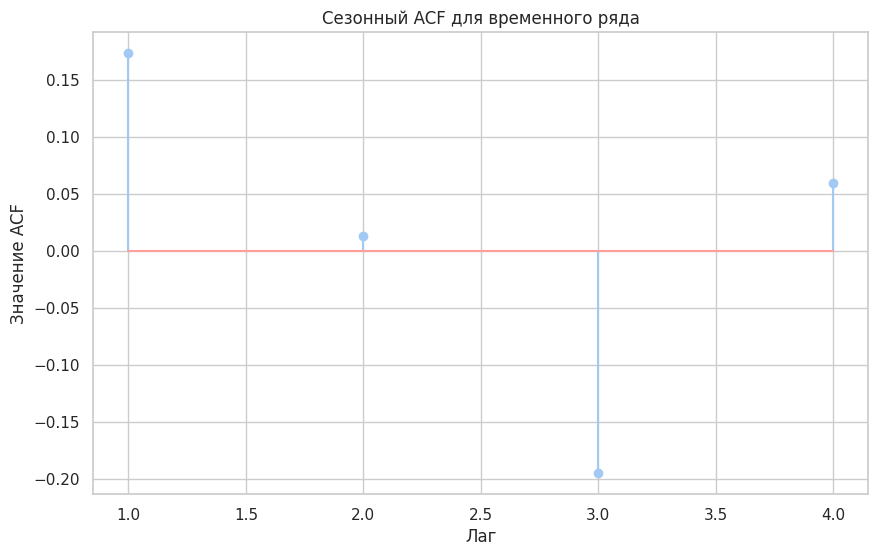

Сезонность во временном ряду не обнаружена.
Анализ завершен.


In [ ]:
pipeline(df, 'bezr(cfo)', plot_diff_series=False, plot_acf_pacf_flag=False)

ADF Statistic: -3.8034810741356675
p-value: 0.002871899185371669
Critical Values: {'1%': -3.5925042342183704, '5%': -2.931549768951162, '10%': -2.60406594375338}
Исходный ряд уже стационарен. Дифференциация не требуется.
Исходный ряд уже стационарен. Дифференциация не требуется.


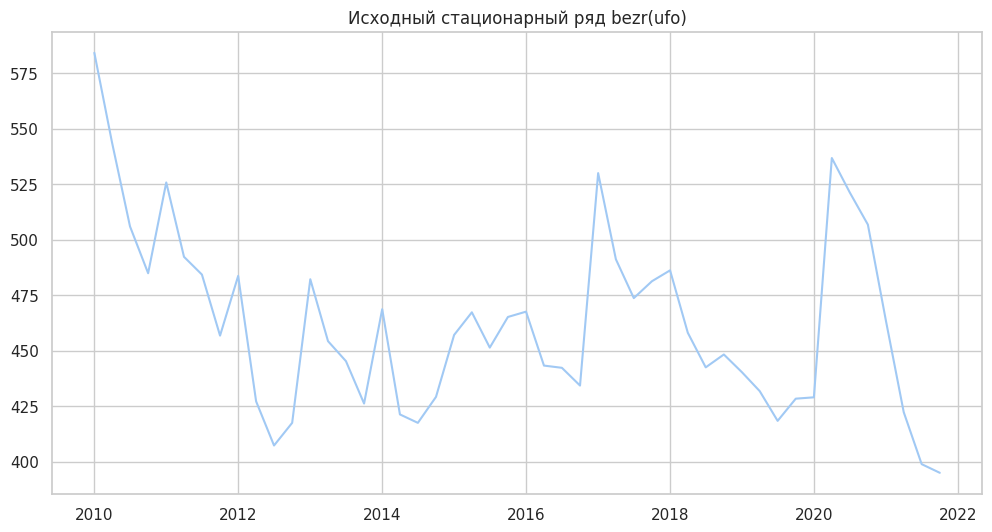


Проверка сезонности на исходном ряде:


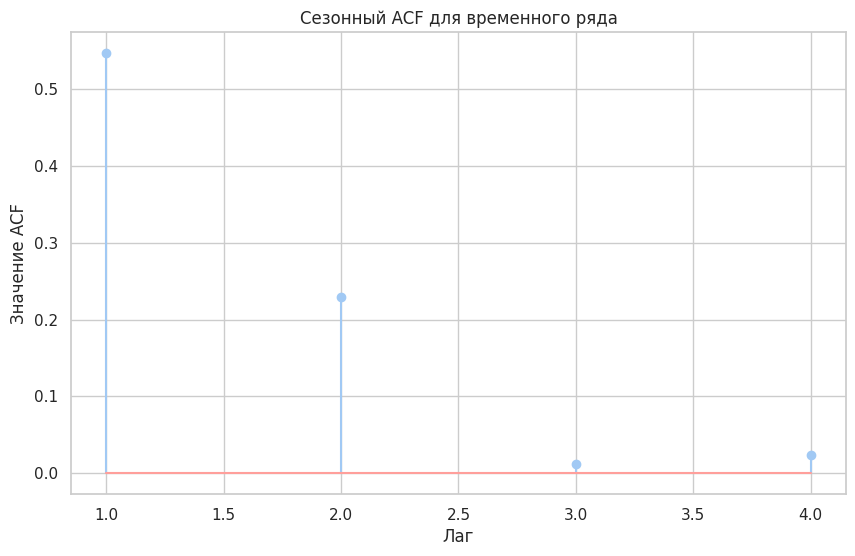

Обнаружена сезонность во временном ряду.


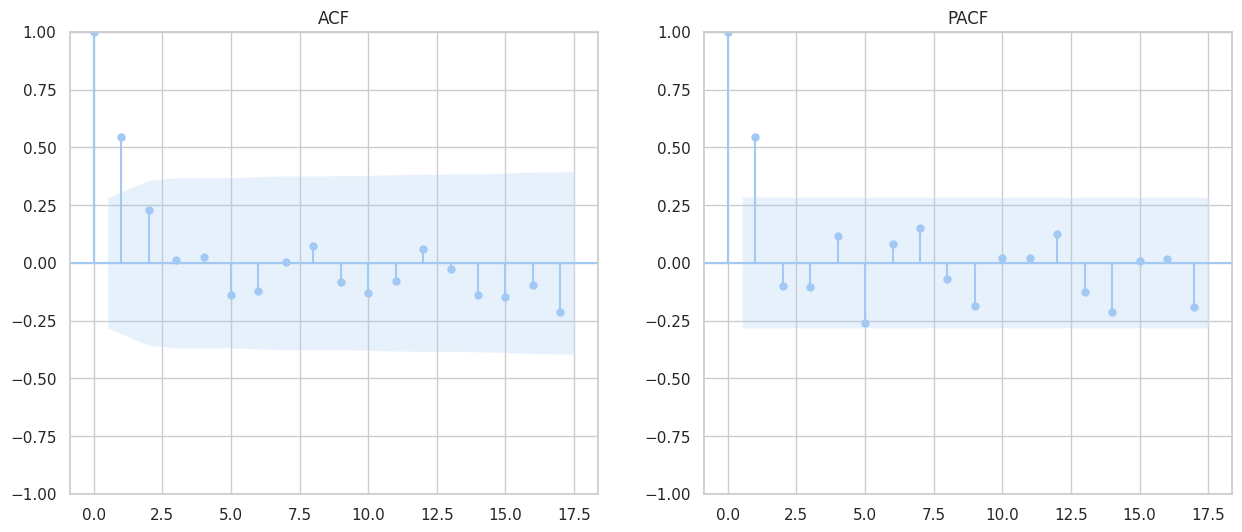

Анализ завершен.


In [ ]:
pipeline(df, 'bezr(ufo)', plot_diff_series=True, plot_acf_pacf_flag=True)

ADF Statistic: -3.8034810741356675
p-value: 0.002871899185371669
Critical Values: {'1%': -3.5925042342183704, '5%': -2.931549768951162, '10%': -2.60406594375338}
Исходный ряд уже стационарен. Дифференциация не требуется.
Исходный ряд уже стационарен. Дифференциация не требуется.


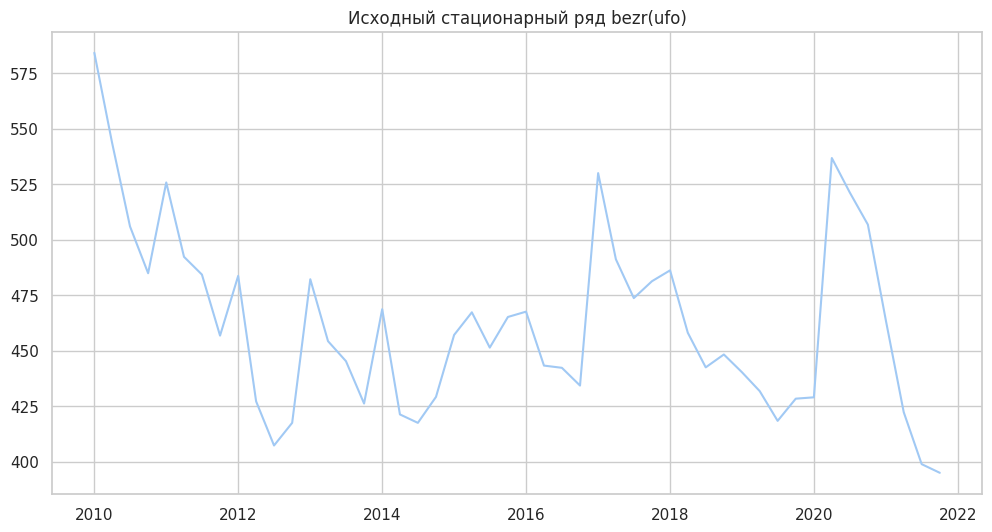


Проверка сезонности на исходном ряде:


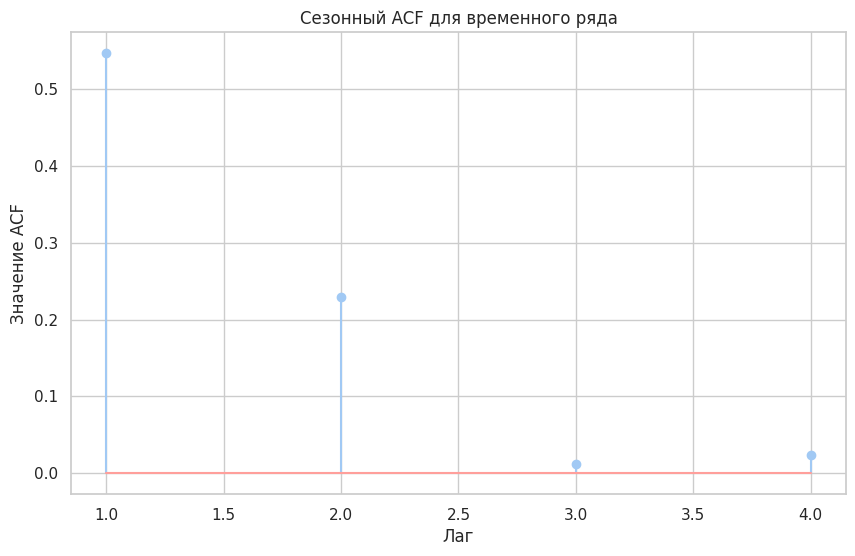

Обнаружена сезонность во временном ряду.


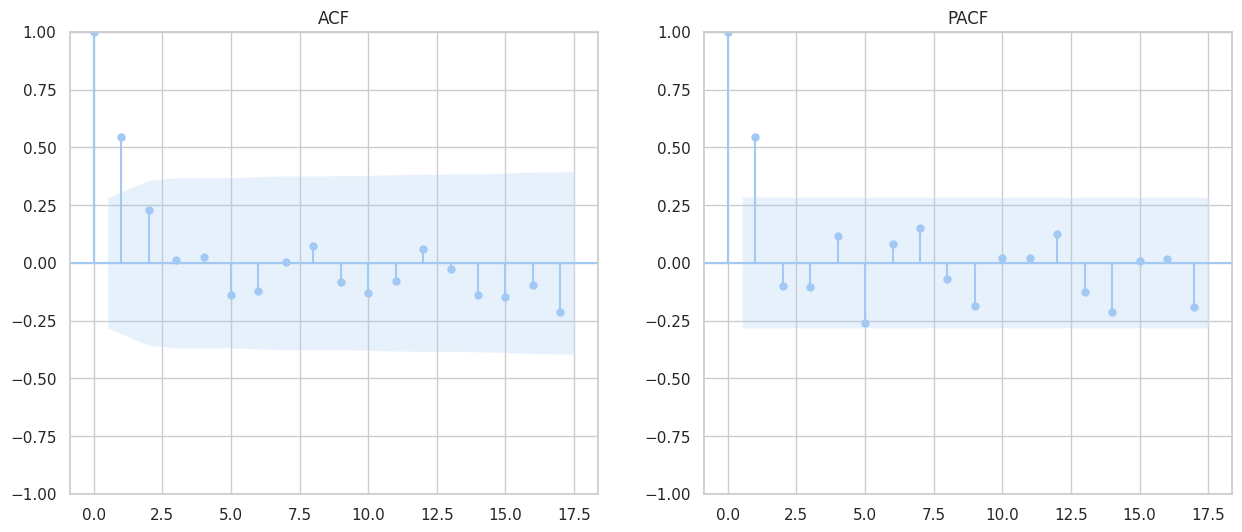

Анализ завершен.


In [ ]:
pipeline(df, 'bezr(ufo)', plot_diff_series=True, plot_acf_pacf_flag=True)

ADF Statistic: -3.8034810741356675
p-value: 0.002871899185371669
Critical Values: {'1%': -3.5925042342183704, '5%': -2.931549768951162, '10%': -2.60406594375338}
Исходный ряд уже стационарен. Дифференциация не требуется.
Исходный ряд уже стационарен. Дифференциация не требуется.

Проверка сезонности на исходном ряде:


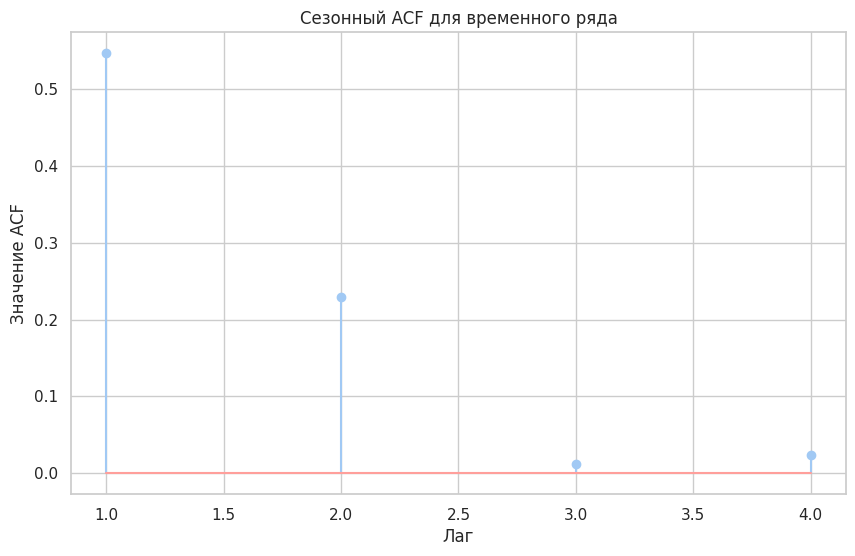

Обнаружена сезонность во временном ряду.
Анализ завершен.


In [ ]:
pipeline(df, 'bezr(ufo)', plot_diff_series=False, plot_acf_pacf_flag=False)

ADF Statistic: -0.3360689161963596
p-value: 0.9202382694661035
Critical Values: {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625}
ADF Statistic: -0.3360689161963596
p-value: 0.9202382694661035
Critical Values: {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625}
ADF Statistic: -4.555434648501648
p-value: 0.00015593546952287908
Critical Values: {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625}
Ряд стационарен после 1 дифференциаций.

Проверка сезонности на дифференцированном ряде:


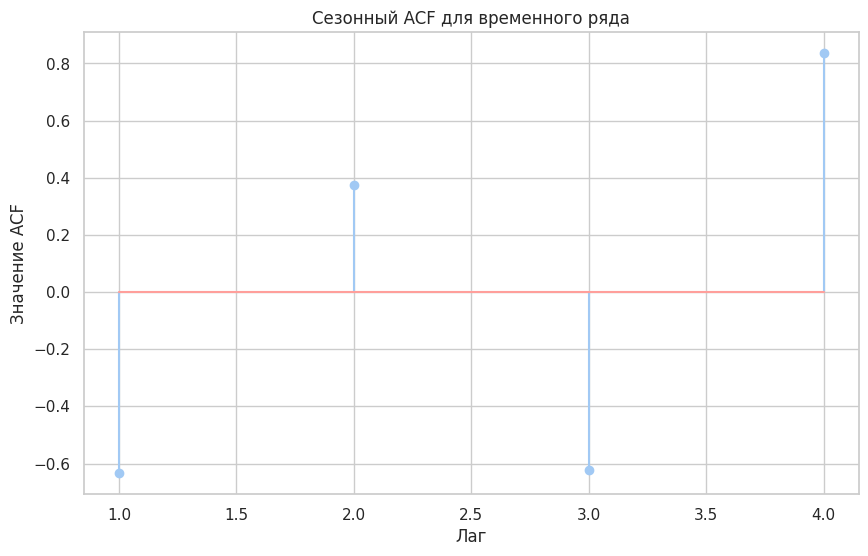

Обнаружена сезонность во временном ряду.


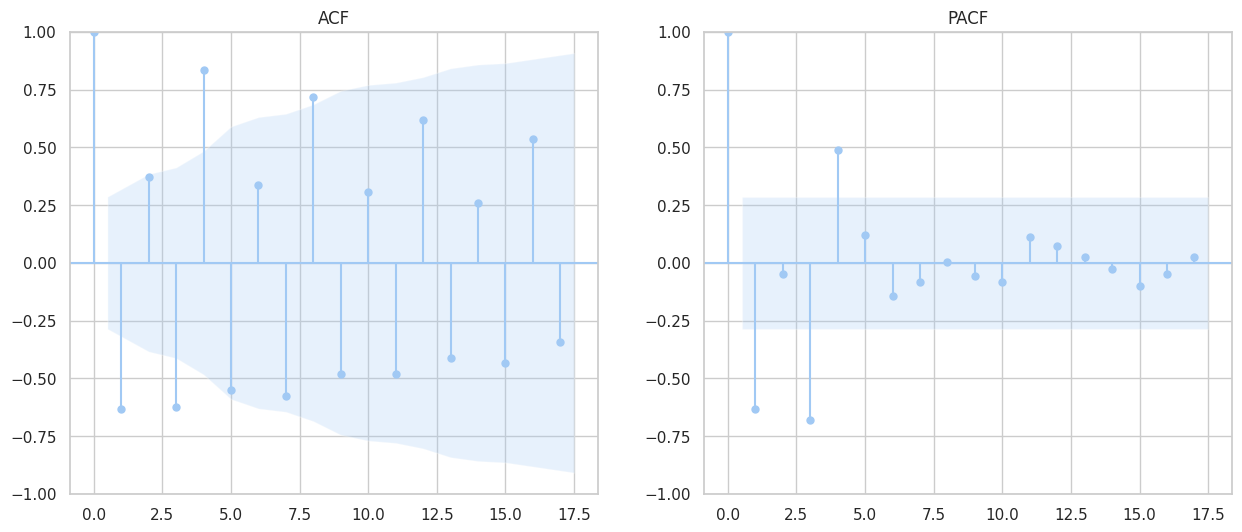

Анализ завершен.


In [ ]:
pipeline(df, 'srd(cfo)', plot_diff_series=False, plot_acf_pacf_flag=True)

ADF Statistic: -2.7994998207873305
p-value: 0.05834525063680254
Critical Values: {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}
ADF Statistic: -2.7994998207873305
p-value: 0.05834525063680254
Critical Values: {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}
ADF Statistic: -6.140535281590984
p-value: 7.991415298953591e-08
Critical Values: {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}
Ряд стационарен после 1 дифференциаций.

Проверка сезонности на дифференцированном ряде:


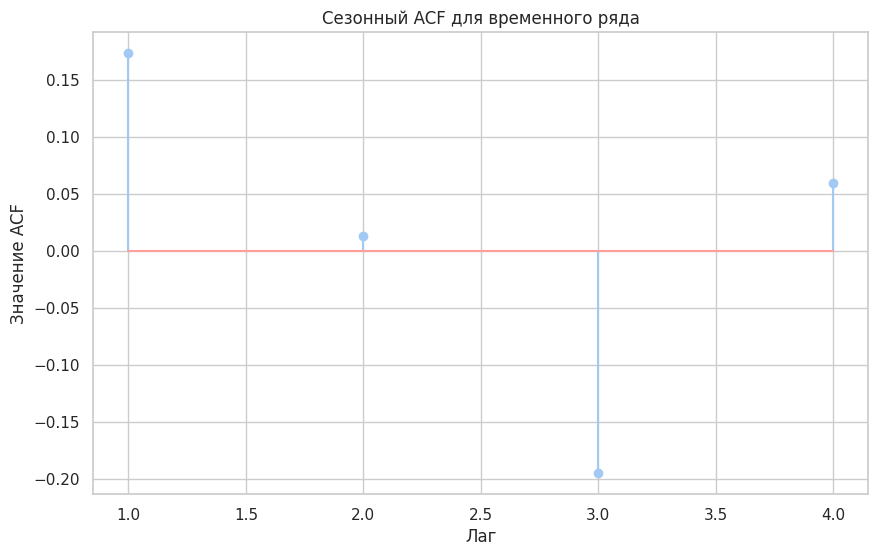

Сезонность во временном ряду не обнаружена.


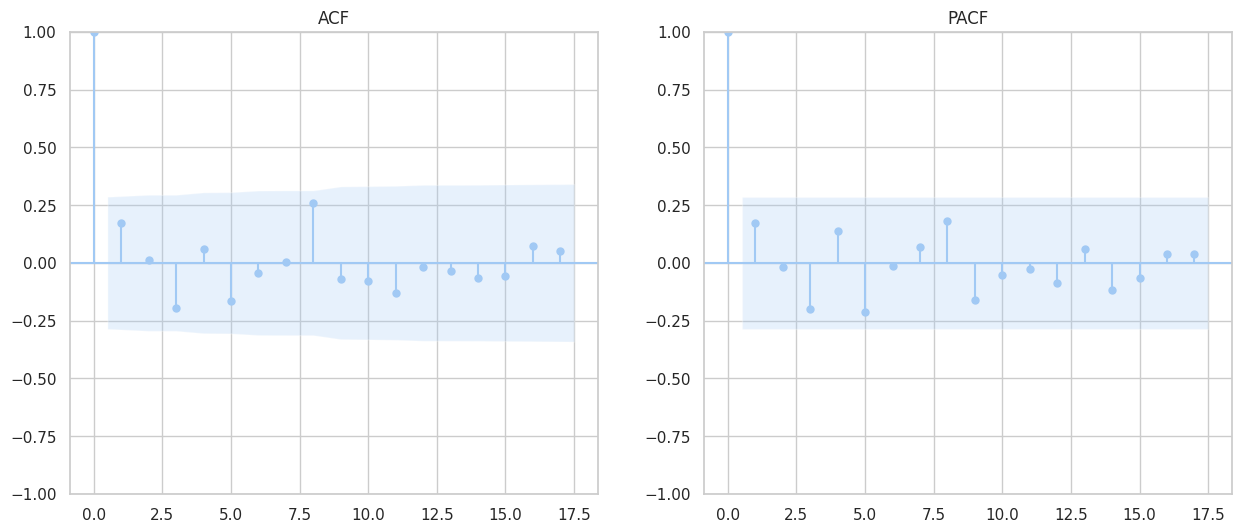

Анализ завершен.


In [ ]:
pipeline(df, 'bezr(cfo)', plot_diff_series=False, plot_acf_pacf_flag=True)